#Part A:

1. Describe the importance of training and test data. Why do we separate data into these subsets?

Training and test data allow us to teach our models how to make predictions accurately. For example, if I am using a K-nearest neighbors classification algorithm, I would need training data to determine the euclidean distance between the training points and the test points. For example, if the number of neighbors is k = 2, the model would use two points from the training data to predict the test point. That is why training and test sets are needed to make predictions. That is also why we separate the data into these two sets, usually at a 70/30 split

2. What is k-fold cross-validation and what do we use it for?

K-fold cross-validation splits data into k equal parts and uses each part once as a test set and then trains the remaining k-1 parts. This process is then repeated k times and provides a performance score that can be used to prevent underfitting and overfitting, making it useful when designing models.


3. How is k-fold cross-validation different from stratified k-fold cross validation?

Stratified k-fold cross-validation differs by maintaining the class distribution across all folds, which is particularly useful for imbalanced datasets. This way, each fold has a similar proportion of each class, ensuring a more representative evaluation, whereas regular k-fold CV doesn't account for class proportions in each split. For example, in a sample with 1000 observations with 700 class A observations and 300 class B observations, using a regular k-fold cross validation will allocate different proportions of each class to each fold, which can cause problems with the model's predictive power. Stratification allows each fold to have the same proportion of classes, which accounts for imbalanced data and therefore leads to better predictive power in the model.

4. Name the 4 types of supervised learning models that we have learned thus far that are used to predict categorical dependent variables like whether an email is labelled spam or not spam.

1. KNN Classifier
2. Logistical Regression
3. Decision Trees
4. Support Vector Machines (SVM)

5. Name the three types of supervised learning models that we have learned thus far that are used to predict continuous dependent variables like test scores.

1. KNN Regressor
2. Linear Regression
3. Lasso and Ridge Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/spam_dataset.csv')


In [ ]:
target_feature = 'spam'
explanatory_vars = 'capital_run_length_average:', 'word_freq_free:', 'char_freq_$:'

2. Which three variables do you think will be important predictors in a model of spam? Why?

I chose to use the variables capital_run_length_average, char_freq_$, and word_freq_free. This is because I believe that any emails that have long, unbroken capitalized words are meant to be urgent but it is also quite informal, so spam emails may do this. The dollar sign could also be a common way to show the email recipient a scam for some kind of product or promotion, and the word free might come up in tandem with this.

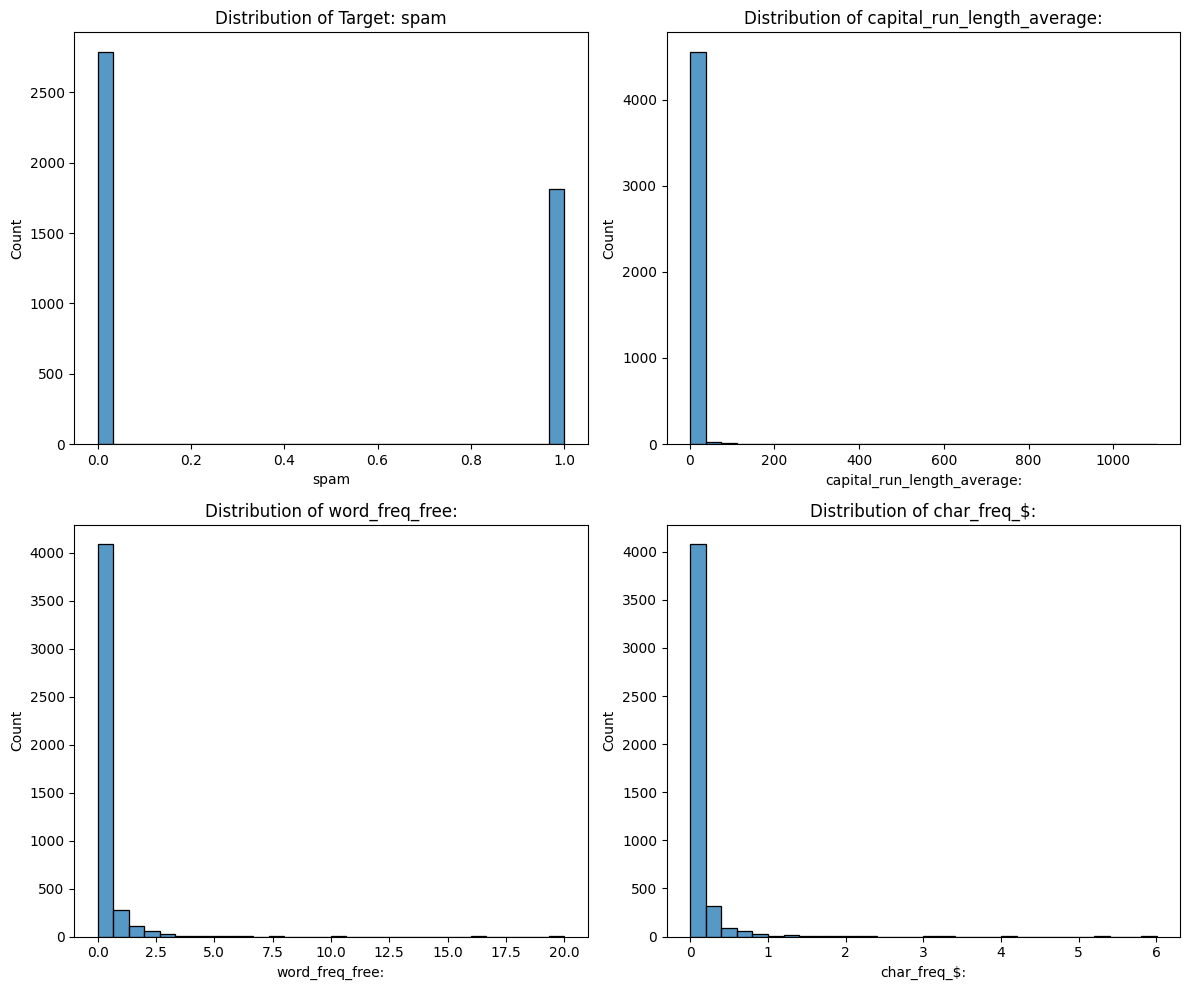

In [ ]:
# Visualize the target and explanatory variables together in a grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Target variable plot
sns.histplot(df[target_feature], bins=30, ax=axes[0, 0])
axes[0, 0].set_title(f'Distribution of Target: {target_feature}')

# Explanatory variables plots
for i, var in enumerate(explanatory_vars):
    sns.histplot(df[var], bins=30, ax=axes[(i+1)//2, (i+1)%2])
    axes[(i+1)//2, (i+1)%2].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

4. Choose one model from Part A question 4. Split the data into training and test subsets. Build a model with the three variables in the dataset that you think would be good predictors of spam. Run the model and evaluate the prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model.

In [ ]:
#running a logistical regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
import numpy as np

# Define features and target variable
X = df[['capital_run_length_average:', 'char_freq_$:', 'word_freq_free:']]
y = df[['spam']].values.ravel()  # Convert y to a 1D array

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize logistic regression model without regularization
logreg = LogisticRegression(penalty= None, max_iter=5000)

# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle = True, random_state=42)  # 10-fold CV

# Perform k-fold cross-validation and compute metrics
predictions = cross_val_predict(logreg, X_train, y_train, cv=kfold)  # cross-validated predictions
cv_accuracy = cross_val_score(logreg, X_train, y_train, cv=kfold, scoring='accuracy')
cv_f1_score = cross_val_score(logreg, X_test, y_test, cv=kfold, scoring='f1')

# Calculate Prediction Error and F1-Score
prediction_error = mean_squared_error(y_train, predictions)  # Prediction error (MSE)
mean_f1_score = np.mean(cv_f1_score)

# Print results
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_accuracy):.2f}')
print(f'Mean F1 Score: {mean_f1_score:.2f}')
print(f'Prediction Error (MSE): {prediction_error:.2f}')


Mean Cross-Validation Accuracy: 0.82
Mean F1 Score: 0.77
Prediction Error (MSE): 0.18


I chose not to use a penalized model largely because I wanted to remove the possibility of one of the features being sidelined by the penalized parameters. I wanted to incorporate all three features equally in this model. This model's accuracy is decent, but it could be improved since the cross-validation score is not above 0.9. The f1 score indicates generally good precision and recall but 0.74 is still low for this scenario.

In [ ]:
#5. Repeat the previous question but with a different model from Part A question 4.
#Let's use a KNN classifier

from sklearn.neighbors import KNeighborsClassifier


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors as needed

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y2_pred = knn.predict(X_test)

# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold CV

# Perform k-fold cross-validation and compute metrics
predictions = cross_val_predict(knn, X_train, y_train, cv=kfold)  # cross-validated predictions
cv_accuracy = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
cv_f1_score = cross_val_score(knn, X_test, y_test, cv=kfold, scoring='f1')

# Calculate Prediction Error and F1-Score
prediction_error = mean_squared_error(y_train, predictions)  # Prediction error (MSE)
mean_f1_score = np.mean(cv_f1_score)

# Print results
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_accuracy):.2f}')
print(f'Mean F1 Score: {mean_f1_score:.2f}')
print(f'Prediction Error (MSE): {prediction_error:.2f}')


Mean Cross-Validation Accuracy: 0.84
Mean F1 Score: 0.75
Prediction Error (MSE): 0.16


The KNN classifier appears to perform slightly better than the logistical model with three neighbors. I chose to use three neighbors as the standard after experimenting with 5 and 7 neighbors but there was a danger of overfitting so I had to stick with 3.

In [ ]:
# 6. Let's try using decision trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, f1_score
from sklearn.decomposition import PCA

X = df[['capital_run_length_average:', 'char_freq_$:', 'word_freq_free:']]  # Your feature variables
y = df['spam']  # Your target variable

# Set up K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize lists to store metrics
cv_scores = []
mse_scores = []
f1_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    cv_scores.append(accuracy)
    mse_scores.append(mse)
    f1_scores.append(f1)

# Output cross-validation results
print(f'Mean Cross-Validation Accuracy Score: {np.mean(cv_scores):.2f}')
print(f'Mean Cross-Validation MSE: {np.mean(mse_scores):.2f}')
print(f'Mean Cross-Validation F1 Score: {np.mean(f1_scores):.2f}')

dt_model.fit(X_train, y_train)
y_pred_final = dt_model.predict(X)

report = classification_report(y, y_pred_final)
print('Classification Report:')
print(report)




Mean Cross-Validation Accuracy Score: 0.82
Mean Cross-Validation MSE: 0.18
Mean Cross-Validation F1 Score: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2788
           1       0.97      0.91      0.94      1813

    accuracy                           0.95      4601
   macro avg       0.96      0.94      0.95      4601
weighted avg       0.95      0.95      0.95      4601



This decision tree model seems to perform slightly worse than KNN but slightly better than the logistical model. Adding a few more trees through a random forest might benefit the model's accuracy instead of just using one tree like I did here.

In [ ]:

from sklearn.svm import SVC

# Example data preparation (ensure your feature names are correct)
X = df[['capital_run_length_average:', 'char_freq_$:', 'word_freq_free:']]  # Your feature variables
y = df['spam']  # Your target variable

# Set up K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='linear')

# Initialize lists to store metrics
cv_scores = []
mse_scores = []
f1_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    cv_scores.append(accuracy)
    mse_scores.append(mse)
    f1_scores.append(f1)

# Output cross-validation results
print(f'Mean Cross-Validation Accuracy Score: {np.mean(cv_scores):.2f}')
print(f'Mean Cross-Validation MSE: {np.mean(mse_scores):.2f}')
print(f'Mean Cross-Validation F1 Score: {np.mean(f1_scores):.2f}')

# Fit the model on the entire dataset for final evaluation
svm_model.fit(X, y)
y_pred_final = svm_model.predict(X)

# Generate classification report
report = classification_report(y, y_pred_final)
print('Classification Report:')
print(report)




Mean Cross-Validation Accuracy Score: 0.83
Mean Cross-Validation MSE: 0.17
Mean Cross-Validation F1 Score: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2788
           1       0.88      0.66      0.76      1813

    accuracy                           0.83      4601
   macro avg       0.85      0.80      0.81      4601
weighted avg       0.84      0.83      0.83      4601



This linear SVM has similar accuracy scores to the logistical model. I chose to use a linear SVM because it performed the best out of the other polynomial and rbf SVM models. I did this by changing the argument in the code to 'poly' or 'rbf' from 'linear'.

In [ ]:

from sklearn.pipeline import Pipeline


# Define features and target variable with additional features included
X = df[['capital_run_length_average:', 'char_freq_$:', 'word_freq_free:',
        'word_freq_our:', 'char_freq_!:', 'capital_run_length_longest:']]
y = df[['spam']].values.ravel()  # Convert y to a 1D array

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Set up the pipeline with logistic regression
pipeline = Pipeline([
    ('logreg', LogisticRegression(penalty=None, max_iter=5000))])

# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute metrics
predictions = cross_val_predict(pipeline, X_train, y_train, cv=kfold)  # cross-validated predictions
cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
cv_f1_score = cross_val_score(pipeline, X_test, y_test, cv=kfold, scoring='f1')

# Calculate Prediction Error and F1-Score
prediction_error = mean_squared_error(y_train, predictions)  # Prediction error (MSE)
mean_f1_score = np.mean(cv_f1_score)

# Print results
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_accuracy):.2f}')
print(f'Mean F1 Score: {mean_f1_score:.2f}')
print(f'Prediction Error (MSE): {prediction_error:.2f}')


Mean Cross-Validation Accuracy: 0.84
Mean F1 Score: 0.84
Prediction Error (MSE): 0.16


Adding three new variables improved the accuracy of the logistical model from the previous one but only by a few decimal points (0.83 to 0.85 and 0.74 to 0.79).

In [ ]:

# Define features and target variable with additional features included
X = df[['capital_run_length_average:', 'char_freq_$:', 'word_freq_free:',
        'word_freq_our:', 'char_freq_!:', 'capital_run_length_longest:']]
y = df[['spam']].values.ravel()  # Convert y to a 1D array

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Set up the pipeline with logistic regression
pipeline = Pipeline([('KNeighborsClassifier', KNeighborsClassifier())])

# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute metrics
predictions = cross_val_predict(pipeline, X_train, y_train, cv=kfold)  # cross-validated predictions
cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
cv_f1_score = cross_val_score(pipeline, X_test, y_test, cv=kfold, scoring='f1')

# Calculate Prediction Error and F1-Score
prediction_error = mean_squared_error(y_train, predictions)  # Prediction error (MSE)
mean_f1_score = np.mean(cv_f1_score)

# Print results
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_accuracy):.2f}')
print(f'Mean F1 Score: {mean_f1_score:.2f}')
print(f'Prediction Error (MSE): {prediction_error:.2f}')


Mean Cross-Validation Accuracy: 0.83
Mean F1 Score: 0.72
Prediction Error (MSE): 0.17


The KNN model also improves after adding the three variables.

In [ ]:


# Define features and target variable with additional features included
X = df[['capital_run_length_average:', 'char_freq_$:', 'word_freq_free:',
        'word_freq_our:', 'char_freq_!:', 'capital_run_length_longest:']]
y = df[['spam']].values.ravel()  # Convert y to a 1D array

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Set up the pipeline with logistic regression
pipeline = Pipeline([('svm_model', SVC())])

# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute metrics
predictions = cross_val_predict(pipeline, X_train, y_train, cv=kfold)  # cross-validated predictions
cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
cv_f1_score = cross_val_score(pipeline, X_test, y_test, cv=kfold, scoring='f1')

# Calculate Prediction Error and F1-Score
prediction_error = mean_squared_error(y_train, predictions)  # Prediction error (MSE)
mean_f1_score = np.mean(cv_f1_score)

# Print results
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_accuracy):.2f}')
print(f'Mean F1 Score: {mean_f1_score:.2f}')
print(f'Prediction Error (MSE): {prediction_error:.2f}')


Mean Cross-Validation Accuracy: 0.73
Mean F1 Score: 0.59
Prediction Error (MSE): 0.27




The SVM model actually appears to have decreased in accuracy after adding the three new variables. This could be due to overfitting or the curse of dimensionality.

In [ ]:


# Define features and target variable with additional features included
X = df[['capital_run_length_average:', 'char_freq_$:', 'word_freq_free:',
        'word_freq_our:', 'char_freq_!:', 'capital_run_length_longest:']]
y = df[['spam']].values.ravel()  # Convert y to a 1D array

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)

# Set up the pipeline with logistic regression
pipeline = Pipeline([('dt_model', DecisionTreeClassifier())])

# Set up k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute metrics
predictions = cross_val_predict(pipeline, X_train, y_train, cv=kfold)  # cross-validated predictions
cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
cv_f1_score = cross_val_score(pipeline, X_test, y_test, cv=kfold, scoring='f1')

# Calculate Prediction Error and F1-Score
prediction_error = mean_squared_error(y_train, predictions)  # Prediction error (MSE)
mean_f1_score = np.mean(cv_f1_score)





# Print results
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_accuracy):.2f}')
print(f'Mean F1 Score: {mean_f1_score:.2f}')
print(f'Prediction Error (MSE): {prediction_error:.2f}')


Mean Cross-Validation Accuracy: 0.87
Mean F1 Score: 0.76
Prediction Error (MSE): 0.14



The decision tree model's f1 score worsened slightly after the addition of three new variables, but the cv score increased slightly. The logistical model after adding three more variables performs the best.

9. What's a variable that isn't available in this dataset but you think could increase your final model's predictive power if you think you had it? Why do you think that it would improve your model?

I think a variable that stores the frequency of words that have a sexual context are very common in spam. It's highly informal and I feel like correspondence that involves sexual activity is usually uncommon in email threads because its quite informal.